In [1]:
#importando libs necessárias
import cv2 as cv
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
from face_detection import get_imagens
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# passar o path do vídeo e número do diretorio
get_imagens('/dir/a.mp4', 0)
get_imagens('/dir/b.mp4', 1)
get_imagens('/dir/c.mp4', 2)
get_imagens('/dir/d.mp4', 3)

In [2]:
# redimensionar a imagem para (80 x 80) pixels
# lendo todas os diretórios com as imagens existens no projeto

path     = [0, 1, 2, 3] # nome de cada path com as imagens
category = 0            # categoriza cada entrada
label    = []           # coluna (y) com o atributo alvo
images   = []           # armazena as imagens

for p in path:
    count = 1
    while(True):
        image = cv.imread('dataset/'+str(p)+'/img'+str(count)+'.jpg')
        try:
            resize = cv.resize(image, (80, 80))
            images.append(resize)
            label.append(category)
            count = count + 1
        except:
            category = category + 1
            break

In [3]:
# convertendo as listas para np.array 
images = np.array(images)
label = np.array(label)
x = label.astype(np.int8)

In [4]:
# splitando a base em dados de Teste e Treino (10 e 90 (%) respectivamente)

X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.1, random_state=2)

print(X_train.shape)
print(X_test.shape)

# convertendo vetor inteiro para matriz
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

print(y_train.shape)
print(y_test.shape)

(1436, 80, 80, 3)
(160, 80, 80, 3)
(1436, 4)
(160, 4)


In [5]:
# convertendo valore para escala de 0 a 1
X_train = X_train/255
X_test = X_test/255

Começando treinamento do modelo

In [6]:
# Importações necessárias
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [7]:
num_class = category # número de classes para a base de dados

# contruindo o modelo de rede convolucional 
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=X_train[0].shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_split=0.15, epochs=10, verbose=1, shuffle=1, batch_size=300)

Epoch 1/10
5/5 [==============================] - 5s 1s/step - loss: 5.7672 - accuracy: 0.2770 - val_loss: 1.3959 - val_accuracy: 0.1898
Epoch 2/10
5/5 [==============================] - 5s 1s/step - loss: 1.2333 - accuracy: 0.4803 - val_loss: 0.9064 - val_accuracy: 0.6389
Epoch 3/10
5/5 [==============================] - 5s 1s/step - loss: 0.5528 - accuracy: 0.8197 - val_loss: 0.4277 - val_accuracy: 0.8565
Epoch 4/10
5/5 [==============================] - 5s 975ms/step - loss: 0.3273 - accuracy: 0.8852 - val_loss: 0.1211 - val_accuracy: 0.9583
Epoch 5/10
5/5 [==============================] - 5s 1s/step - loss: 0.1176 - accuracy: 0.9582 - val_loss: 0.0968 - val_accuracy: 0.9630
Epoch 6/10
5/5 [==============================] - 5s 973ms/step - loss: 0.0899 - accuracy: 0.9631 - val_loss: 0.0601 - val_accuracy: 0.9722
Epoch 7/10
5/5 [==============================] - 4s 852ms/step - loss: 0.0485 - accuracy: 0.9836 - val_loss: 0.0339 - val_accuracy: 0.9907
Epoch 8/10
5/5 [================

In [9]:
# testando modelo criado com o conjunto de testes.
score = model.evaluate(X_test, y_test, verbose=0)

print('Test Score: ', score[0])
print('Accuracy Score: ', score[1])

Test Score:  0.2885177731513977
Accuracy Score:  0.9750000238418579


Class:  [0]


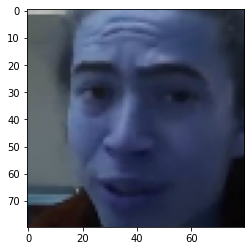

In [18]:
pred = model.predict_classes(np.array([X_test[0]]))
print('Class: ', pred)
plt.imshow(X_test[0])

Text(0.5, 0, 'Epoch')

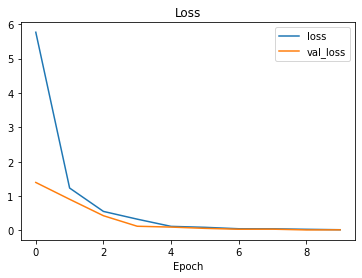

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0, 0.5, 'Número de imagens')

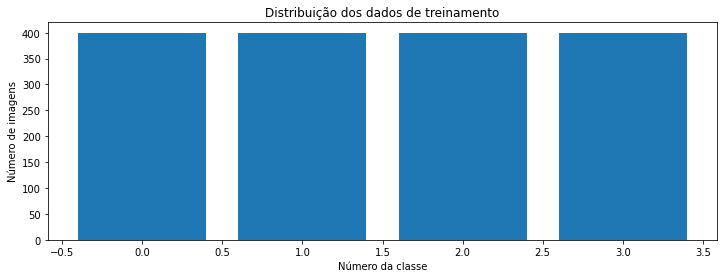

In [20]:
plt.figure(figsize=(12,4))
plt.bar(range(0, category), 400)
plt.title("Distribuição dos dados de treinamento")
plt.xlabel("Número da classe")
plt.ylabel("Número de imagens")

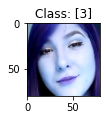

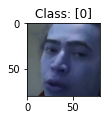

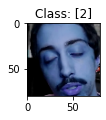

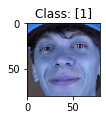

In [39]:

lista = []
lista.append(X_test[4])
lista.append(X_test[3])
lista.append(X_test[2])
lista.append(X_test[1])

fg = plt.figure()
a = fg.add_subplot(1, 4, 1)
pred = model.predict_classes(np.array([lista[0]]))
a.set_title('Class: ' + str(pred))
plt.imshow(lista[0])

fg = plt.figure()
a = fg.add_subplot(1, 4, 2)
pred = model.predict_classes(np.array([lista[1]]))
a.set_title('Class: ' + str(pred))
plt.imshow(lista[1])

fg = plt.figure()
a = fg.add_subplot(1, 4, 3)
pred = model.predict_classes(np.array([lista[2]]))
a.set_title('Class: ' + str(pred))
plt.imshow(lista[2])

fg = plt.figure()
a = fg.add_subplot(1, 4, 4)
pred = model.predict_classes(np.array([lista[3]]))
a.set_title('Class: ' + str(pred))
plt.imshow(lista[3])
plt.show()


#print('Max Score: ', max_value)
#print('Class: ', num_class)

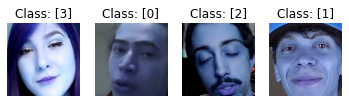

In [42]:
#Imagens do conjunto de teste
fig = plt.figure()
count = 1
for a in lista:
    a = fig.add_subplot(1, 4, count)
    plt.axis("off")
    pred = model.predict_classes(np.array([lista[count - 1]]))
    a.set_title('Class: ' + str(pred))
    plt.imshow(lista[count-1])
    count = count + 1

plt.show()